In [1]:
import cv2 as cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.measure import compare_ssim
print('ok')

ok


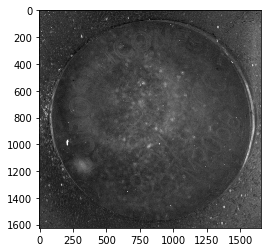

In [204]:
im_path = '/home/abert/Documents/NumeriCube/eurosilicone/gcaesthetics-implantbox/dataset/step2_orientationfixer/img_val/'
im_origine = cv2.imread(im_path + 'FULL-2019-04-26-153945.png',0)
im2 = im_origine.copy()

plt.imshow(im2, cmap = 'gist_gray')
plt.show()


                       
                       

(1624, 1652)


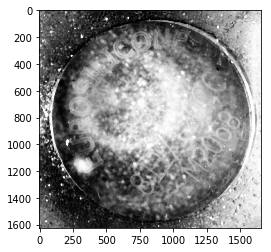

In [205]:
im3 = cv2.equalizeHist(im2)
im3 = cv2.medianBlur(im3,11)



size = im3.shape
print(size)
plt.imshow(im3, cmap = 'gist_gray')
plt.show()

In [206]:
'''
Parameters 1 and 2 don't affect accuracy as such, more reliability. 
Param 1 will set the sensitivity; how strong the edges of the circles need to be. 
Too high and it won't detect anything, too low and it will find too much clutter. 
Param 2 will set how many edge points it needs to find to declare that it's found a circle. 
Again, too high will detect nothing, too low will declare anything to be a circle. 
The ideal value of param 2 will be related to the circumference of the circles.'''

if size[0] > 1400 or size[1] > 1400:   
    print('big chip')
    circles = cv2.HoughCircles(im3,cv2.HOUGH_GRADIENT,10,1,
                            param1=100,param2=100,minRadius=840,maxRadius=1000)
else:
    print('other sizes of chips')
    circles = cv2.HoughCircles(im3,cv2.HOUGH_GRADIENT,10,1,
                            param1=1,param2=1000,minRadius=700,maxRadius=1000)
print(circles)

big chip
[[[ 875.  935.  851.]
  [ 705.  835.  862.]
  [ 885.  945.  873.]
  ...
  [1335. 1595.  906.]
  [1405. 1565.  851.]
  [1355. 1605.  884.]]]


[875 935 851]


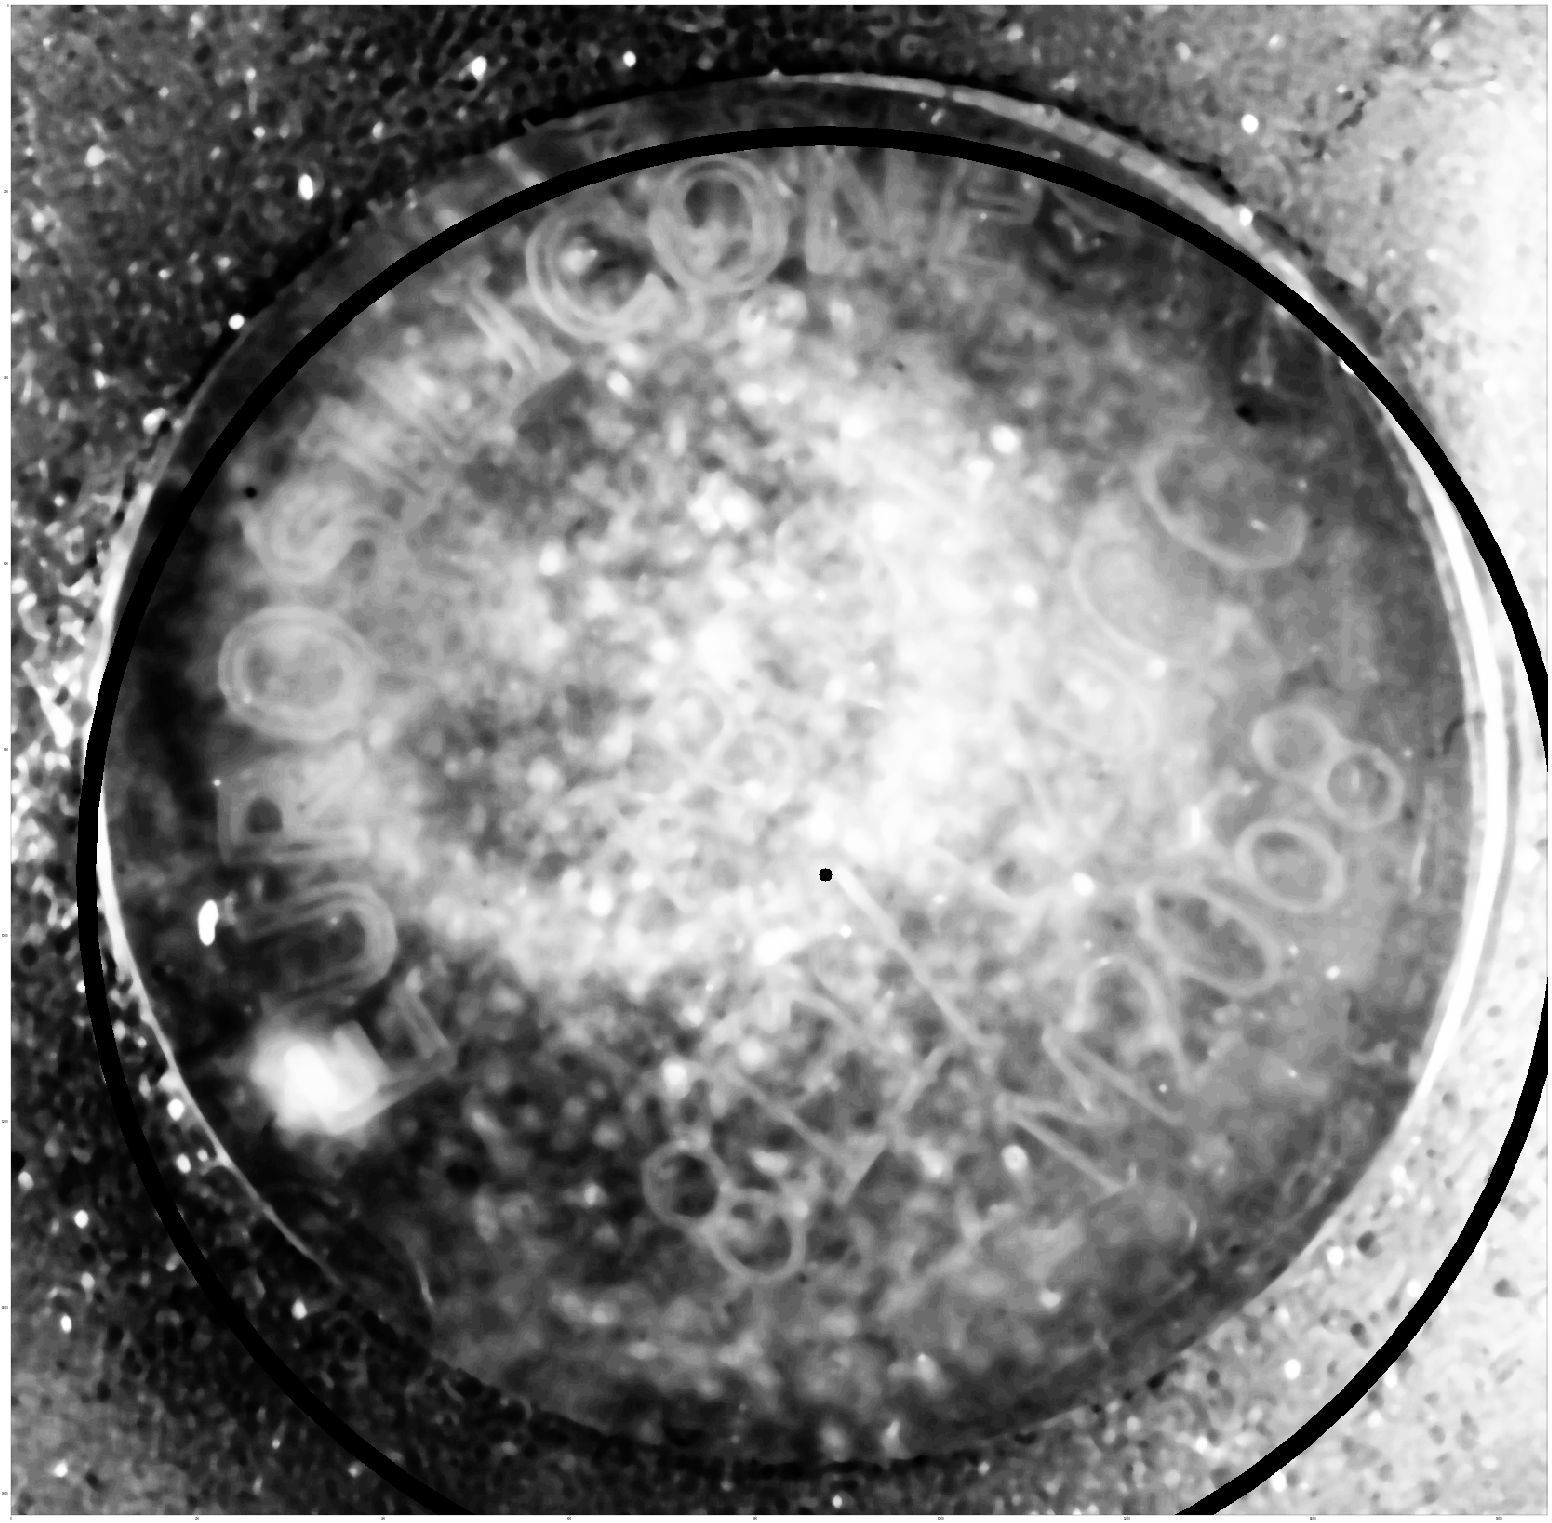

(1624, 1652)
4041


In [207]:
im4 = im3.copy()
circles = np.uint16(np.around(circles))
c = circles[0,0]
print(c)
mask = np.zeros(size, np.uint8)

# draw the outer circle
cv2.circle(mask,(c[0],c[1]),c[2]-int(c[2]/15),(255,255,255),-1)
cv2.circle(im4,(c[0],c[1]),c[2]-int(c[2]/15),(0,0,0),20)
# draw the center of the circle
cv2.circle(mask,(c[0],c[1]),2,(255,255,255),-1)
cv2.circle(im4,(c[0],c[1]),2,(0,0,0),10)

fig=plt.figure(figsize=(100, 100), dpi= 20, facecolor='w', edgecolor='k')
plt.set_cmap('gist_gray')


#plt.imshow(mask)
plt.imshow(im4)
plt.show()
print(mask.shape)
print(len(circles[0,:]))

(1608, 1761)


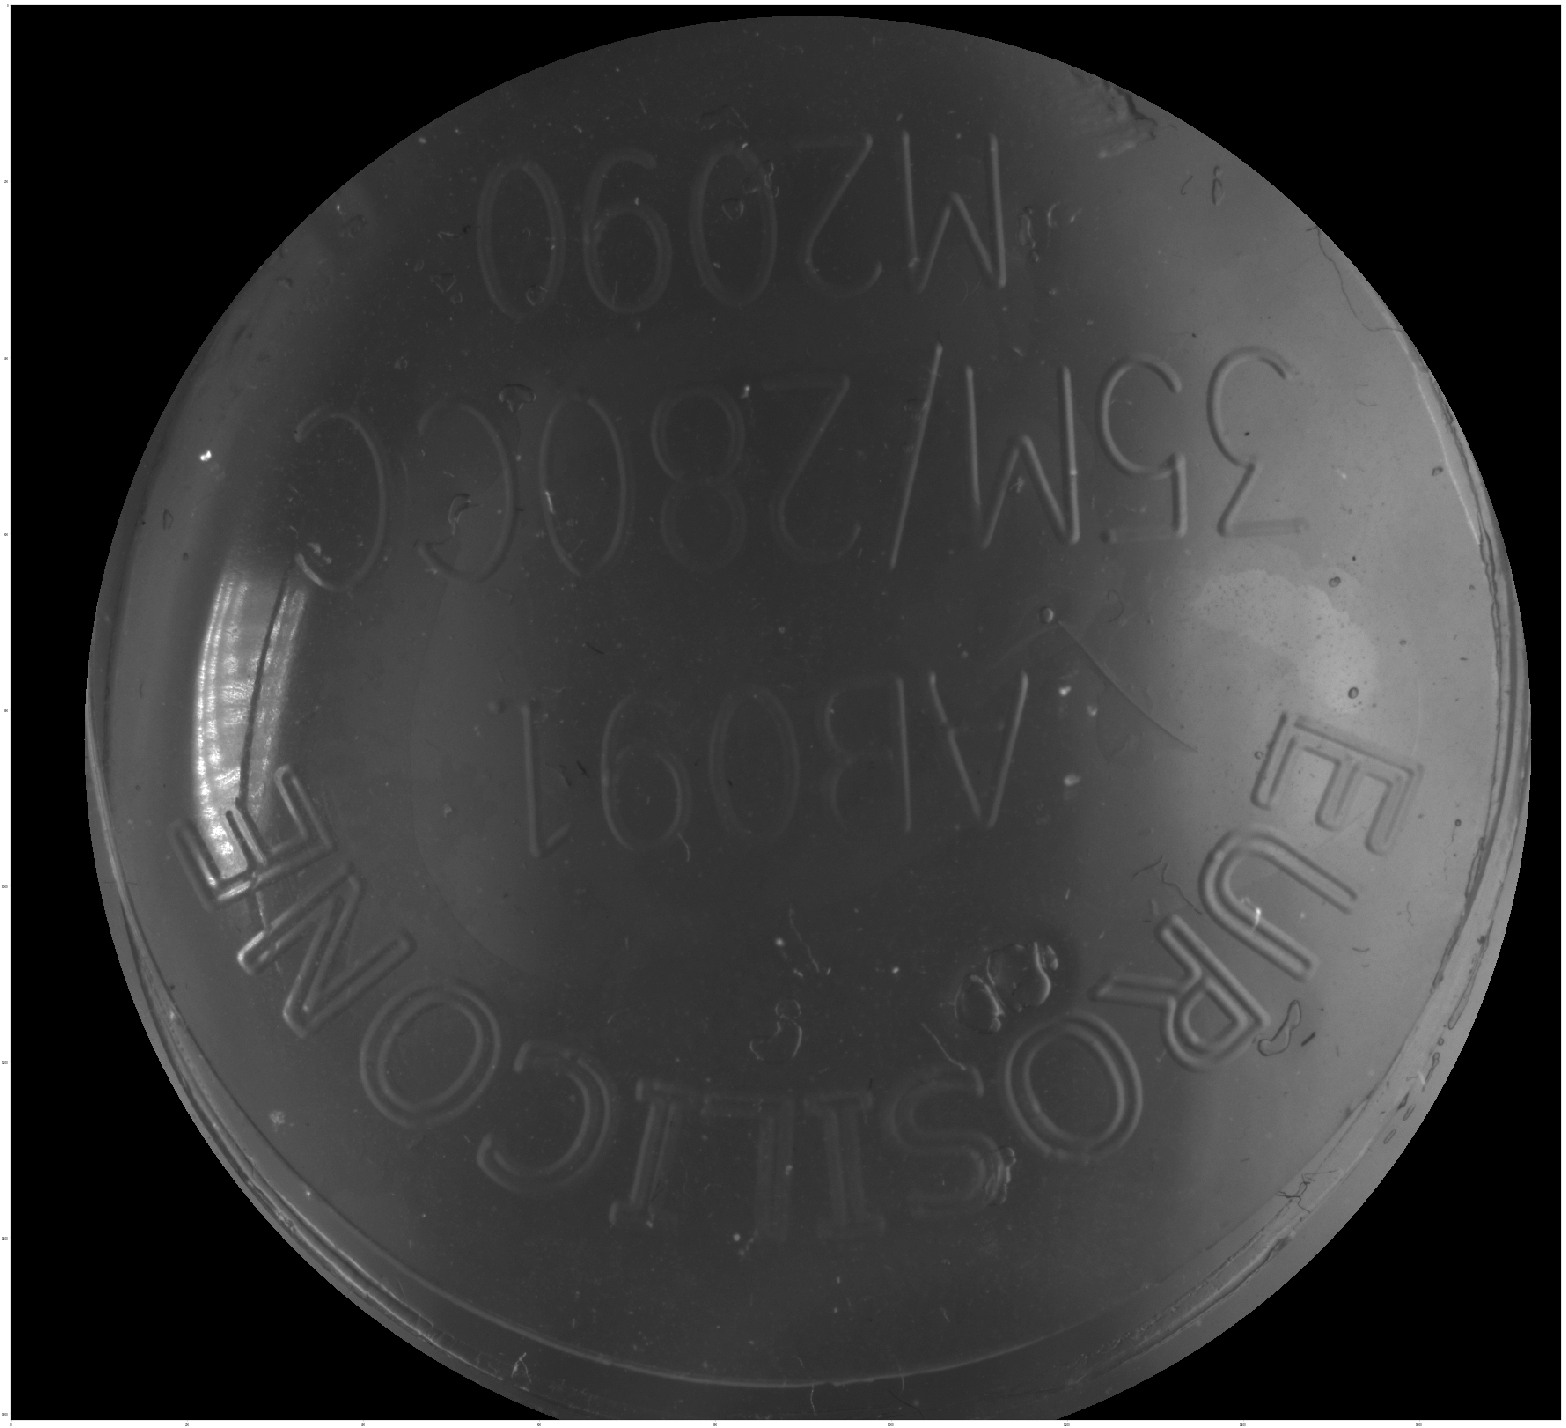

In [160]:
masked_data = cv2.bitwise_and(im2, im2, mask=mask)
print(masked_data.shape)
fig=plt.figure(figsize=(100, 100), dpi= 20, facecolor='w', edgecolor='k')
plt.set_cmap('gist_gray')

plt.imshow(masked_data)
plt.show()

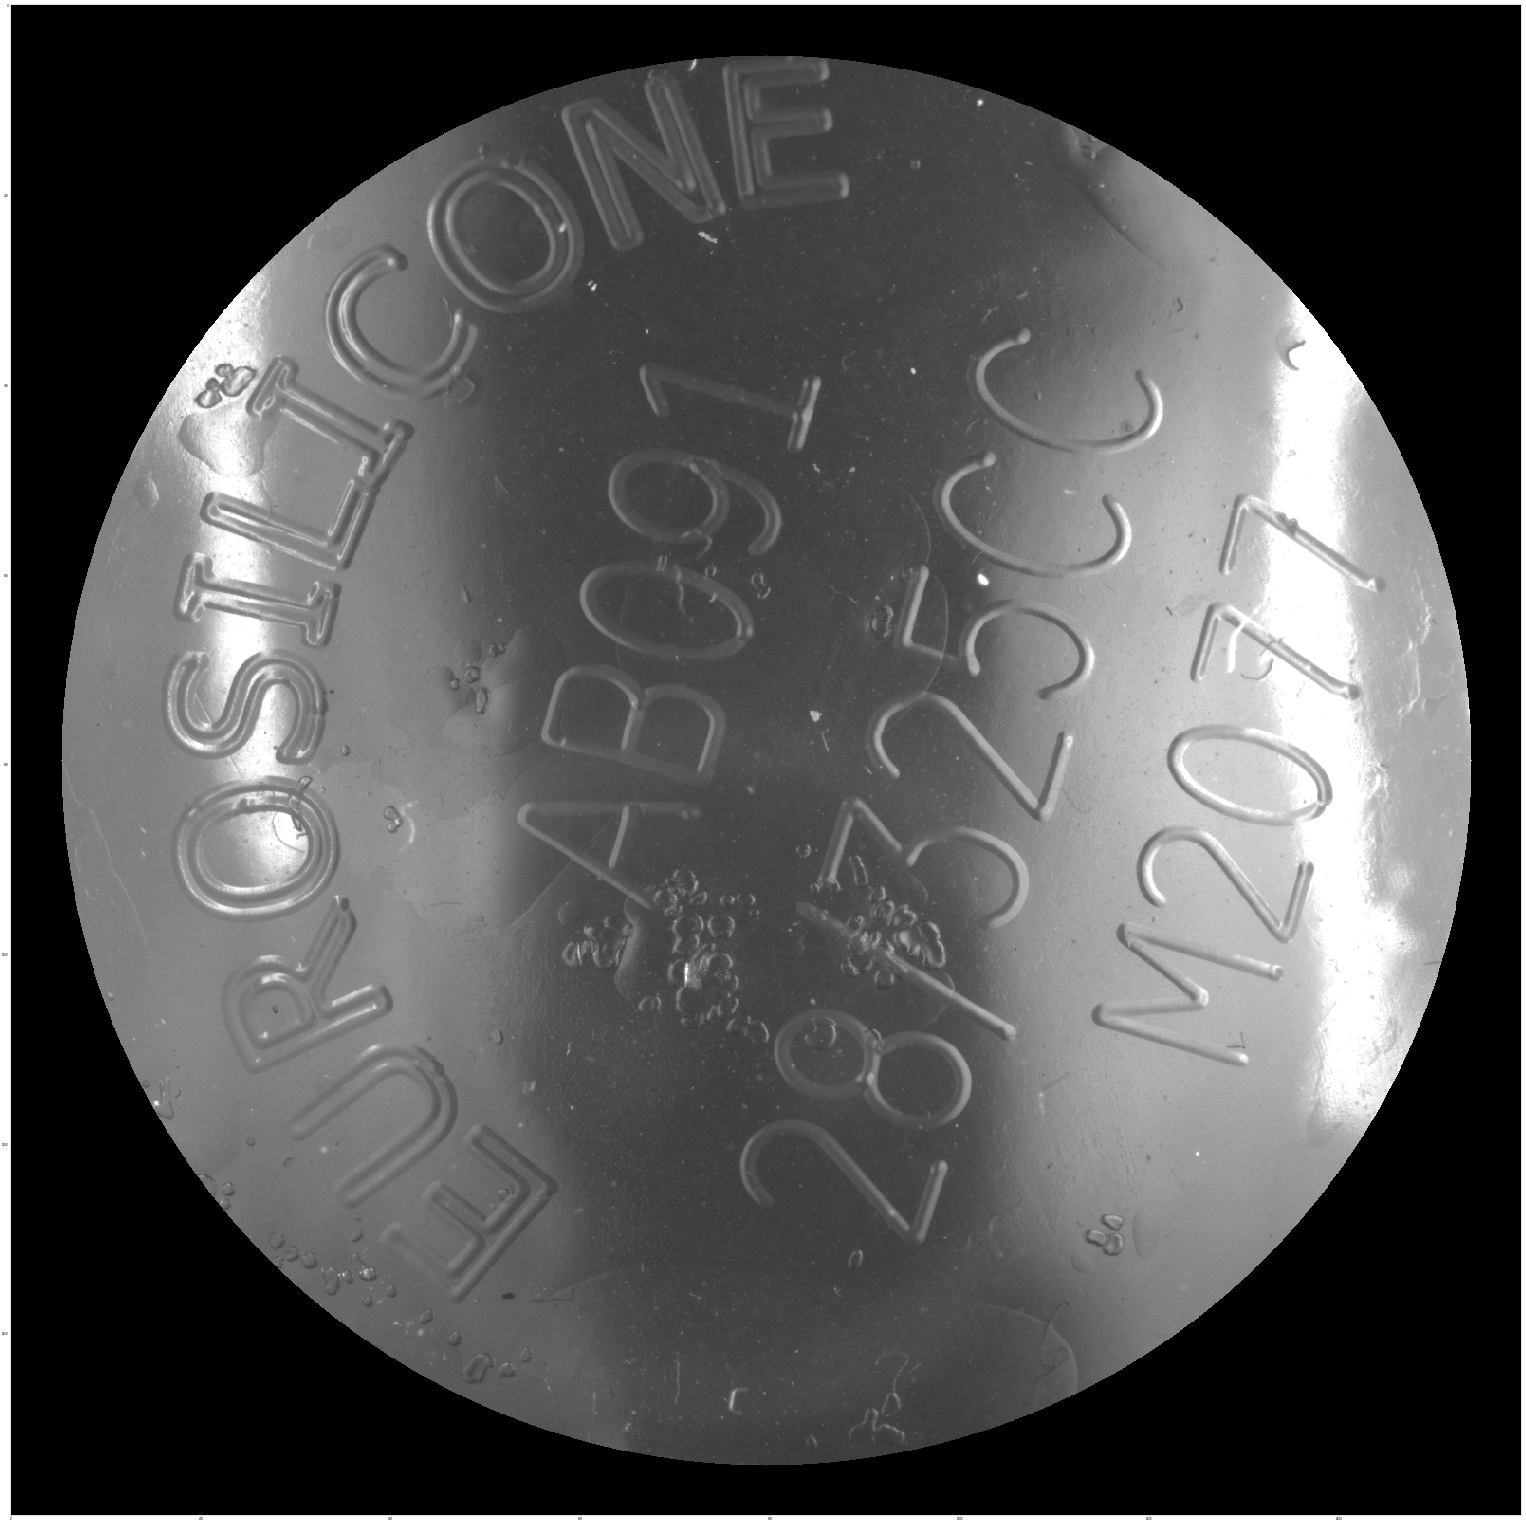

In [110]:

x1,y1,x2,y2 = c[0]-c[2],c[1]-c[2],c[0]+c[2],c[1]+c[2]
crop = masked_data[y1:y2,x1:x2]

fig=plt.figure(figsize=(100, 100), dpi= 20, facecolor='w', edgecolor='k')
plt.set_cmap('gist_gray')
plt.imshow(crop)
plt.show()

(1592, 1592)


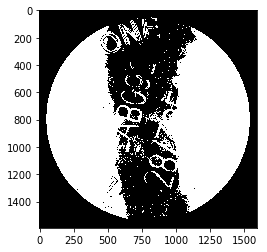

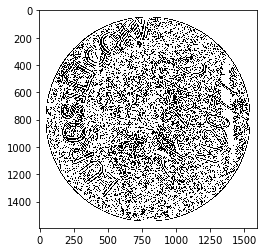

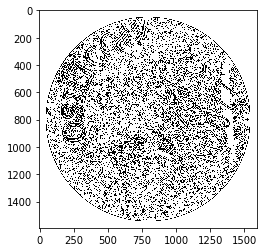

In [126]:
print(crop.shape)
th1 = cv2.threshold(crop, 80, 255, cv2.THRESH_BINARY)[1]
th2 = cv2.adaptiveThreshold(crop,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(crop,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

#fig=plt.figure(figsize=(100, 100), dpi= 20, facecolor='w', edgecolor='k')
plt.set_cmap('gist_gray')

plt.imshow(th1)
plt.show()

plt.imshow(th2)
plt.show()

plt.imshow(th3)
plt.show()

In [34]:
cv2.namedWindow('detected circles',cv2.WINDOW_NORMAL)
cv2.resizeWindow('detected circles', (1200,1200))
cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
from PIL import Image
import os, os.path

im_path = '/home/abert/Documents/NumeriCube/eurosilicone/gcaesthetics-implantbox/dataset/step2_precise_circle/img_val/'
output_path = '/home/abert/Documents/NumeriCube/eurosilicone/gcaesthetics-implantbox/dataset/step3_orientationfixer/without_crop/img_val/'

#im_origine = cv2.imread(im_path + 'FULL-2019-04-26-153945.png',0)
imgs = os.listdir(im_path)
#print(imgs[0:100])
for im in imgs:
    print(im)
    img = cv2.imread(im_path+im,0)

    im3 = cv2.equalizeHist(img)
    im3 = cv2.medianBlur(im3,11)
    size = im3.shape

    
    #Hough cirlce detection.
    #https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=houghcircles
    #function documentation
    
    if size[0] > 1460 or size[1] > 1460:   
        print('big chip')
        circles = cv2.HoughCircles(im3,cv2.HOUGH_GRADIENT,10,10000,
                                param1=100,param2=100,minRadius=700,maxRadius=1000)

    else:
        print('other sizes of chips')
        circles = cv2.HoughCircles(im3,cv2.HOUGH_GRADIENT,5,10000,
                                param1=100,param2=100,minRadius=100,maxRadius=600)
    
    if not circles is None:
        """
        if len(circles[0,:])>3:
            for k in range(2):
                c = circles[0,k]
                # draw the outer circle
                cv2.circle(cimg,(c[0],c[1]),c[2],(0,255,0),1)
                # draw the center of the circle
                cv2.circle(cimg,(c[0],c[1]),2,(0,0,255),1)
        """   
        mask = np.zeros(size, np.uint8)
        c = circles[0,0]
                    
        # draw the outer circle
        cv2.circle(mask,(c[0],c[1]),c[2],(255,255,255),-1)
        cv2.circle(im3,(c[0],c[1]),c[2],(0,0,0),5)
        # draw the center of the circle
        cv2.circle(mask,(c[0],c[1]),2,(255,255,255),-1)
        cv2.circle(im3,(c[0],c[1]),2,(0,0,0),1)
                    
                    
        masked_data = cv2.bitwise_and(img, img, mask=None)
        print(masked_data.shape)
                    
        #fig=plt.figure(figsize=(100, 100), dpi= 20, facecolor='w', edgecolor='k')
        #plt.set_cmap('gist_gray')
        #plt.imshow(masked_data)
        #plt.show()
        print(c)
        c = c.astype(int)
        x1,y1,x2,y2 = c[0]-c[2],c[1]-c[2],c[0]+c[2],c[1]+c[2]
        if x1<0:
            x1 = 0
        if y1<0:
            y1 = 0
        if x2>size[1]:
            x2 = size[1]
            
        if y2>size[0]:
            y2 = size[0]
        crop = masked_data[y1:y2,x1:x2]
        
        #fig=plt.figure(figsize=(100, 100), dpi= 20, facecolor='w', edgecolor='k')
        #plt.set_cmap('gist_gray')
        #plt.imshow(crop)
        #plt.show()
        
        #fig=plt.figure(figsize=(50, 50), dpi= 20, facecolor='w', edgecolor='k')    
        #plt.set_cmap('gist_gray')
        #plt.imshow(im3)
        #plt.show()

        #print(len(circles[0,:]))
        final = cv2.equalizeHist(crop)
        cv2.imwrite(output_path+im,final)
    '''
    cv2.namedWindow('detected circles',cv2.WINDOW_NORMAL)
    cv2.resizeWindow('detected circles', (1200,1200))
    cv2.imshow('detected circles',cimg)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    '''

FULL-2019-04-26-143540.png
big chip
(1758, 1756)
[885. 845. 818.]
FULL-2019-04-26-134003.png
big chip
(1700, 1668)
[815. 855. 807.]
FULL-2019-04-26-161730.png
big chip
(1681, 1685)
[785. 825. 741.]
FULL-2019-04-26-144550.png
big chip
(1738, 1689)
[825. 895. 829.]
Image__2019-05-16__14-12-25.png
big chip
(1535, 1550)
[775. 755. 763.]
FULL-2019-04-26-144532.png
big chip
(1705, 1752)
[935. 845. 829.]
FULL-2019-04-26-153019.png
big chip
(1740, 1709)
[845. 825. 829.]
FULL-2019-04-26-141551.png
big chip
(1767, 1758)
[905. 905. 807.]
FULL-2019-04-26-134625.png
big chip
(1519, 1675)
[835. 695. 818.]
FULL-2019-05-16-145900.png
big chip
(1732, 1690)
[845. 825. 832.]
FULL-2019-04-26-145730.png
big chip
(1773, 1675)
[845. 855. 840.]
FULL-2019-04-26-143453.png
big chip
(1731, 1724)
[875. 865. 862.]
FULL-2019-04-26-155943.png
other sizes of chips
(781, 784)
[397.5 367.5 331. ]
FULL-2019-05-16-150629.png
big chip
(1695, 1702)
[945. 805. 917.]
FULL-2019-04-26-121510.png
other sizes of chips
(1419, 145